In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback as tb

In [2]:
df = pd.read_csv('train.dat', delimiter='\t', header=None)

In [3]:
df.head()

,0,1
0,-1,DVELDLVEISPNALP
1,-1,KADEELFNKLFFGT
2,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,-1,RDQMRARIADITGVAISRIA
4,-1,RKRLQLLLL


In [4]:
df_results = df[0]

In [5]:
df_results.columns = ['Labels']

In [6]:
df_results

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1561   -1
1562    1
1563    1
1564   -1
1565   -1
Name: 0, Length: 1566, dtype: int64

In [7]:
df_seq = df[[1]]

In [8]:
df_seq.columns = ['Sequence']

In [9]:
df_seq.head()

,Sequence
0,DVELDLVEISPNALP
1,KADEELFNKLFFGT
2,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,RDQMRARIADITGVAISRIA
4,RKRLQLLLL


In [10]:
def dna_k_mers_generation(dna_sequence, k_mers_length):
    k_mers_list = []
    try:
        for i in range(len(dna_sequence) - k_mers_length + 1):
            k_mer_substring = dna_sequence[i : i + k_mers_length]
            k_mers_list.append(k_mer_substring)
    except Exception as e:
        tb.print_exc()
    return k_mers_list

In [11]:
# Assuming you have a function to load and preprocess your test dataset
# and your trained neural network 'nn' is available

# Load your test dataset
test_data = pd.read_csv('test.dat', delimiter='\t', header=None)
test_data.columns = ['Sequence']


In [12]:
df_seq.head()
df_seq.shape

(1566, 1)

In [13]:
test_data.shape

(392, 1)

In [14]:
def calculate_amino_acid_frequencies(sequences):
    amino_acids = 'ABCDEFGHIJKLMNOPQRSTUVWXY'
    frequencies = np.zeros((len(sequences), len(amino_acids)))

    for i, sequence in enumerate(sequences):
        for aa in sequence:
            if aa in amino_acids:
                aa_index = amino_acids.index(aa)
                frequencies[i, aa_index] += 1

    return frequencies

# Example usage:
train_sequences = df_seq  # Replace with your actual training sequences
train_aa_frequencies = calculate_amino_acid_frequencies(train_sequences['Sequence'])

# Convert the frequencies to a numpy array or another suitable format for further processing
import numpy as np
train_freq_array = np.array(train_aa_frequencies)

In [15]:
train_freq_array.shape

(1566, 25)

In [16]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Combine training and testing sequences
# combined_sequences = pd.concat([df_seq, test_data], axis=0)
# combined_sequences.shape

# # Initialize CountVectorizer for k-mer features
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))

# # Apply CountVectorizer to the combined sequences
# vectorized_data = vectorizer.fit_transform(combined_sequences['Sequence']).toarray()

# # Split the vectorized data back into training and testing sets
# train_vectorized = vectorized_data[:len(df_seq)]
# test_vectorized = vectorized_data[len(df_seq):]

# # Verify the shapes of the vectorized datasets
# train_vectorized.shape, test_vectorized.shape


In [17]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
# X = vectorizer.fit_transform(df_seq['Sequence']).toarray()
X = train_freq_array

In [18]:
X.shape

(1566, 25)

In [19]:
# k_mers_list = []# Range of k-mer lengths (e.g., 2 to 5)
# for k in range(2, 6):
#     df_seq[f'kmers_{k}'] = df_seq['Sequence'].apply(lambda x: dna_k_mers_generation(x, k))

In [20]:
df_results.shape

(1566,)

In [21]:
from imblearn.over_sampling import SMOTE

y = df_results

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
# Check the balance of the classes
# print(pd.Series(y_resampled).value_counts()).to_clipboard()

In [23]:
df_results.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: 0, dtype: int64

In [24]:
df_results.value_counts()

0
-1    1424
 1     142
Name: count, dtype: int64

In [25]:
df_resampled = pd.DataFrame(X_resampled)
# df_resampled.to_clipboard(index=False)

In [26]:
df_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,1.0,2.0,0.0,6.0,4.0,2.0,0.0,0.0,...,0.0,0.0,5.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0
3,4.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,...,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# df_resampled.to_clipboard()

In [28]:
df_resampled.to_csv('features_resampled_dict_count.csv')
features_resampled = pd.DataFrame(y_resampled)
features_resampled.to_csv('labels_resampled_dict_count.csv')

In [29]:
df_resampled.shape

(2848, 25)

In [30]:
y_resampled.shape

(2848,)

In [31]:
features_resampled.columns = ['Labels']

In [32]:
## Validation test creation
combined_df_resampled = pd.concat([df_resampled, features_resampled], axis= 1)
combined_df_resampled.shape

(2848, 26)

In [33]:
from sklearn.model_selection import train_test_split

df_resampled_train, df_resampled_val, label_resampled_train, label_resampled_val = train_test_split(df_resampled, features_resampled, test_size= 0.25, random_state=21)

In [34]:
print(df_resampled_train.shape)
print(df_resampled_val.shape)
print(label_resampled_train.shape)
print(label_resampled_val.shape)

(2136, 25)
(712, 25)
(2136, 1)
(712, 1)


In [35]:
label_resampled_train

,Labels
1643,1
582,-1
1018,-1
2086,1
842,-1
...,...
2416,1
48,-1
772,1
1848,1


In [52]:
import numpy as np
import scipy.special

class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, lambda_reg):
        # Set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Initialize weights with a normal distribution
        self.wih = np.random.normal(0.0, np.sqrt(2.0 / self.inodes), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        print(self.wih)
        print(self.who)

        # Learning ratek
        self.lr = learningrate
        
        # Activation functions
        self.activation_function_hidden = lambda x: np.maximum(0, x)  # ReLU for hidden layers
        self.activation_function_output = lambda x: scipy.special.expit(x)  # Sigmoid for output layer

        # Regularizing parameter
        self.lambda_reg = lambda_reg

        pass

    def sigmoid(self, x):
        # Modified sigmoid function with input clipping
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        # Adjust targets from -1 to 0, keep 1 as is
        targets = np.array([(0 if t == -1 else 1) for t in targets_list], ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)

        # Error calculation
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        # Gradient for output layer
        output_gradient = output_errors * final_outputs * (1.0 - final_outputs)

        # Gradient clipping for output layer
        max_gradient = 1.0  # Set your desired maximum gradient value
        output_gradient = np.clip(output_gradient, -max_gradient, max_gradient)

        # Update output layer weights
        # self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) + self.lambda_reg * self.who)
        self.who += self.lr * (np.dot(output_gradient, np.transpose(hidden_outputs)) - self.lambda_reg * self.who)

        # Gradient for hidden layer (considering ReLU derivative)
        hidden_gradient = hidden_errors * (hidden_outputs > 0)
        # Gradient clipping for hidden layer
        hidden_gradient = np.clip(hidden_gradient, -max_gradient, max_gradient)

        # Update hidden layer weights
        self.wih += self.lr * (np.dot(hidden_gradient, np.transpose(inputs)) - self.lambda_reg * self.wih)
        
        pass

    def query(self, inputs_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # Forward pass
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function_hidden(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.sigmoid(final_inputs)
        
        return final_outputs

# Example: Creating a Neural Network
input_nodes = 25
hidden_nodes = 18   # Adjust as needed
output_nodes = 1
learning_rate = 0.09
lambda_reg = 0.000

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, lambda_reg)


[[ 2.16071399e-01  1.89512064e-01 -5.60240591e-02 -4.57826650e-02
   3.33096126e-02  9.15017129e-01 -4.14164584e-01  3.96088191e-02
   1.69253911e-01  2.89758213e-01  2.42672717e-01  2.53686122e-03
   7.38304515e-02  1.92138995e-02  1.52678135e-01 -9.79943854e-03
  -2.80580968e-01  1.98235290e-01 -1.05031324e-01  1.59448141e-01
   1.09851663e-01 -2.26622158e-01  4.34214808e-01  1.44450083e-01
  -3.28070572e-01]
 [ 7.74890348e-03 -1.67949177e-01  3.24618289e-01 -7.19477693e-02
   3.10062744e-01 -1.49240767e-01  2.76188296e-01 -6.78293513e-02
   2.86724457e-01 -2.21548729e-01 -1.72679437e-02 -7.98113779e-02
   2.05758743e-01  2.11448663e-01 -6.57406882e-02  2.41349953e-01
   4.07690351e-01 -2.10692073e-01 -3.27392611e-01 -2.55303891e-01
  -1.98380436e-02 -2.97713176e-01 -3.69223389e-01 -7.11437692e-02
   4.90032824e-02]
 [ 5.19370835e-01 -1.03536793e-02  2.69169749e-01 -4.65114999e-01
  -7.78577804e-02 -2.85065873e-03  2.57146025e-01 -6.72020815e-03
  -2.80193359e-01 -2.24692314e-01 -2.2

In [53]:
def mean_squared_error(targets, predictions):
    return np.mean((targets - predictions) ** 2)

In [54]:
predictions = nn.query(df_resampled_train.iloc[1].values)

predictions

array([[0.56278113]])

In [55]:
epochs = 100
losses = []

for epoch in range(epochs):
    epoch_losses = []
    for i in range(len(df_resampled_train)):
        inputs = df_resampled_train.iloc[i].values
        targets = label_resampled_train.iloc[i].values

        output = nn.query(inputs)
        # predictions = np.array(predictions)

        # Convert sigmoid output to -1 or 1
        predicted_label = 1 if output[0] >= 0.5 else -1

        nn.train(inputs, targets)

        sample_loss = mean_squared_error(targets, predicted_label)
        epoch_losses.append(sample_loss)

        nn.train(inputs, targets)

    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)

    # Print the loss for this epoch (optional)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

    # # Log the weights
    # print(f"Weights between input and hidden layer (Mean, Std): {np.mean(nn.wih)}, {np.std(nn.wih)}")
    # print(f"Weights between hidden and output layer (Mean, Std): {np.mean(nn.who)}, {np.std(nn.who)}")



Epoch 1/100, Loss: 0.2902621722846442
Epoch 2/100, Loss: 0.16292134831460675
Epoch 3/100, Loss: 0.11423220973782772
Epoch 4/100, Loss: 0.08426966292134831
Epoch 5/100, Loss: 0.08801498127340825
Epoch 6/100, Loss: 0.05805243445692884
Epoch 7/100, Loss: 0.0449438202247191
Epoch 8/100, Loss: 0.05805243445692884
Epoch 9/100, Loss: 0.04307116104868914
Epoch 10/100, Loss: 0.020599250936329586
Epoch 11/100, Loss: 0.009363295880149813
Epoch 12/100, Loss: 0.009363295880149813
Epoch 13/100, Loss: 0.00749063670411985
Epoch 14/100, Loss: 0.011235955056179775
Epoch 15/100, Loss: 0.00749063670411985
Epoch 16/100, Loss: 0.0056179775280898875
Epoch 17/100, Loss: 0.0056179775280898875
Epoch 18/100, Loss: 0.0056179775280898875
Epoch 19/100, Loss: 0.003745318352059925
Epoch 20/100, Loss: 0.003745318352059925
Epoch 21/100, Loss: 0.003745318352059925
Epoch 22/100, Loss: 0.003745318352059925
Epoch 23/100, Loss: 0.003745318352059925
Epoch 24/100, Loss: 0.003745318352059925
Epoch 25/100, Loss: 0.0018726591760

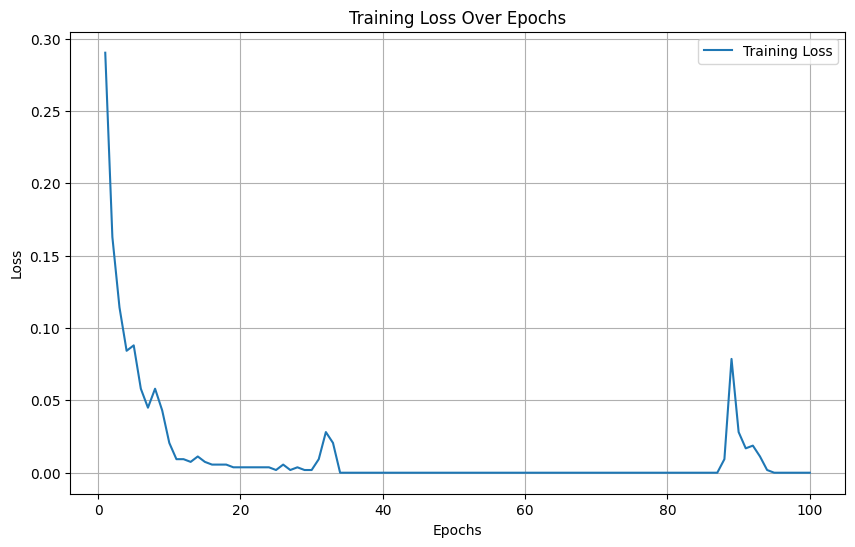

In [56]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# print(df_resampled_train.value_counts())
print(label_resampled_train.value_counts())

Labels
-1        1086
 1        1050
Name: count, dtype: int64


In [58]:
label_resampled_train.iloc[0,0]

1

In [59]:
def calculate_mcc(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / (denominator + np.finfo(float).eps)

In [60]:
def evaluate_model(nn, X_val, y_val):
    predictions = []

    for i in range(len(X_val)):
        inputs = X_val.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.5 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    print(pd.DataFrame(predictions).value_counts())

    if isinstance(y_val, (pd.DataFrame, pd.Series)):
        y_val = y_val.values.flatten()
    mcc_score = calculate_mcc(y_val, predictions)
    return mcc_score

# Calculate MCC for the validation set
mcc_validation = evaluate_model(nn, df_resampled_val, label_resampled_val)
print(f"MCC on Validation Set: {mcc_validation}")

 1    382
-1    330
Name: count, dtype: int64
MCC on Validation Set: 0.9776935260471772


In [61]:
df_resampled_val.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
513,3.000000,0.0,0.000000,1.000000,4.000000,3.000000,2.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,3.000000,3.000000,4.000000,0.0,1.000000,0.0,0.0,0.0
1362,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,3.000000,0.0,0.0,1.0
1584,1.327633,0.0,0.000000,0.000000,0.000000,0.655265,1.000000,0.000000,1.344735,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2099,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,...,0.000000,1.000000,3.633322,0.000000,0.000000,0.0,2.633322,2.0,0.0,0.0
2770,0.000000,0.0,1.254639,0.254639,0.745361,0.000000,0.745361,0.254639,0.000000,0.0,...,0.254639,0.745361,0.745361,0.254639,0.254639,0.0,0.745361,0.0,0.0,0.0


In [62]:
test_aa_frequencies = calculate_amino_acid_frequencies(test_data['Sequence'])
test_freq_array = np.array(test_aa_frequencies)

In [63]:
test_freq_array

array([[4., 0., 1., ..., 0., 0., 1.],
       [4., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 1., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 1.],
       [4., 0., 1., ..., 0., 0., 0.]])

In [64]:
test_vectorized_df = pd.DataFrame(test_freq_array)
test_vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,4.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
1,4.0,0.0,0.0,4.0,3.0,1.0,3.0,0.0,1.0,0.0,...,2.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,...,1.0,1.0,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,4.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
def predict_model(nn, X_test):
    predictions = []

    for i in range(len(X_test)):
        inputs = X_test.iloc[i].values  # Convert DataFrame row to NumPy array
        output = nn.query(inputs)
        predicted_label = 1 if output[0] >= 0.5 else -1
        predictions.append(predicted_label)

    predictions = np.array(predictions)
    return predictions

# Calculate MCC for the validation set
predictions = predict_model(nn, test_vectorized_df)
print(type(predictions))

<class 'numpy.ndarray'>


In [67]:
np.savetxt('format_4.txt', predictions, fmt='%d')
predictions.shape

(392,)

In [94]:
file = open("Sadwi/W1651395/format.txt", "r")
content=file.readlines()
print(content)
file.close()

['-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-1\n', '-

In [95]:
result = pd.read_csv('Sadwi/W1651395/format.txt')
result.shape

(391, 1)

In [97]:
results = result.values.ravel()
np.savetxt('result.dat', results, delimiter='\t', fmt='%d')